# Imputation with MAGIC

In [3]:
import magic

# Plotting and miscellaneous imports
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

## Load the expression data

In [5]:
scdata = magic.mg.SCData.from_csv(os.path.expanduser('../output/exprs.norm.before.imputation.csv'),
                                  data_type='sc-seq', normalize=False)

/Users/davidcook/anaconda3/lib/python3.6/site-packages/magic/mg.py:305: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  df = pd.DataFrame.from_csv( counts_csv_file, sep=delimiter)


In [6]:
scdata

SCData: 591 cells x 14327 genes

data_prefix=True
data_type=True
diffusion_eigenvalues=None
diffusion_eigenvectors=None
diffusion_map_correlations=None
library_sizes=None
magic=None
metadata=True
normalized=True
pca=None
tsne=None

## Impute
Because we've already done all the filtering in R, we don't have to go through the process here.

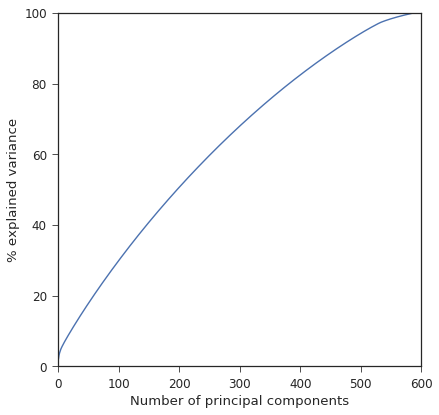

In [12]:
fig, ax = scdata.plot_pca_variance_explained(n_components=600, random=True)

In [36]:
scdata.run_magic(n_pca_components=20, random_pca=True, t=4, k=9, 
                 ka=3, epsilon=1, rescale_percent=0)

doing PCA
Computing distances
Autotuning distances
Computing kernel
MAGIC: L_t = L^t
MAGIC: data_new = L_t * data


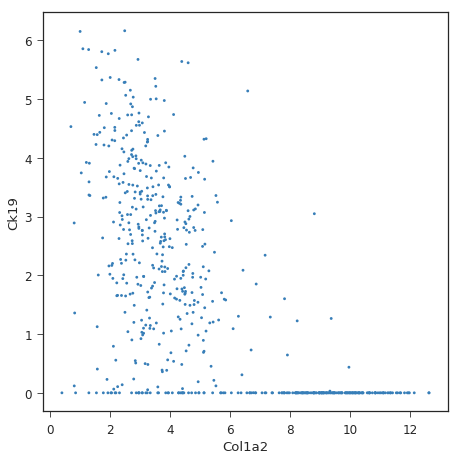

In [13]:
fig, ax = scdata.scatter_gene_expression(['ENSMUSG00000029661', 'ENSMUSG00000020911'])
ax.set_xlabel('Col1a2')
ax.set_ylabel('Ck19')

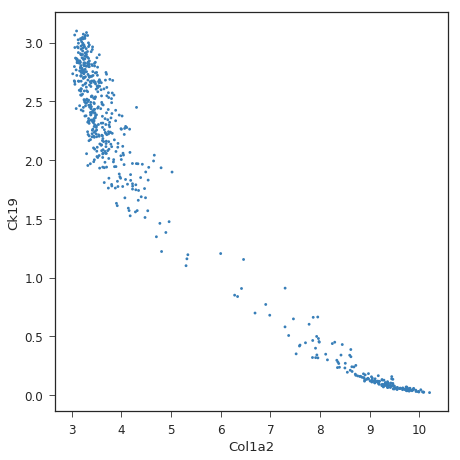

In [37]:
fig, ax = scdata.magic.scatter_gene_expression(['MAGIC ENSMUSG00000029661', 'MAGIC ENSMUSG00000020911'])
ax.set_xlabel('Col1a2')
ax.set_ylabel('Ck19')

In [16]:
scdata.run_pca()

In [38]:
scdata.magic.run_pca()

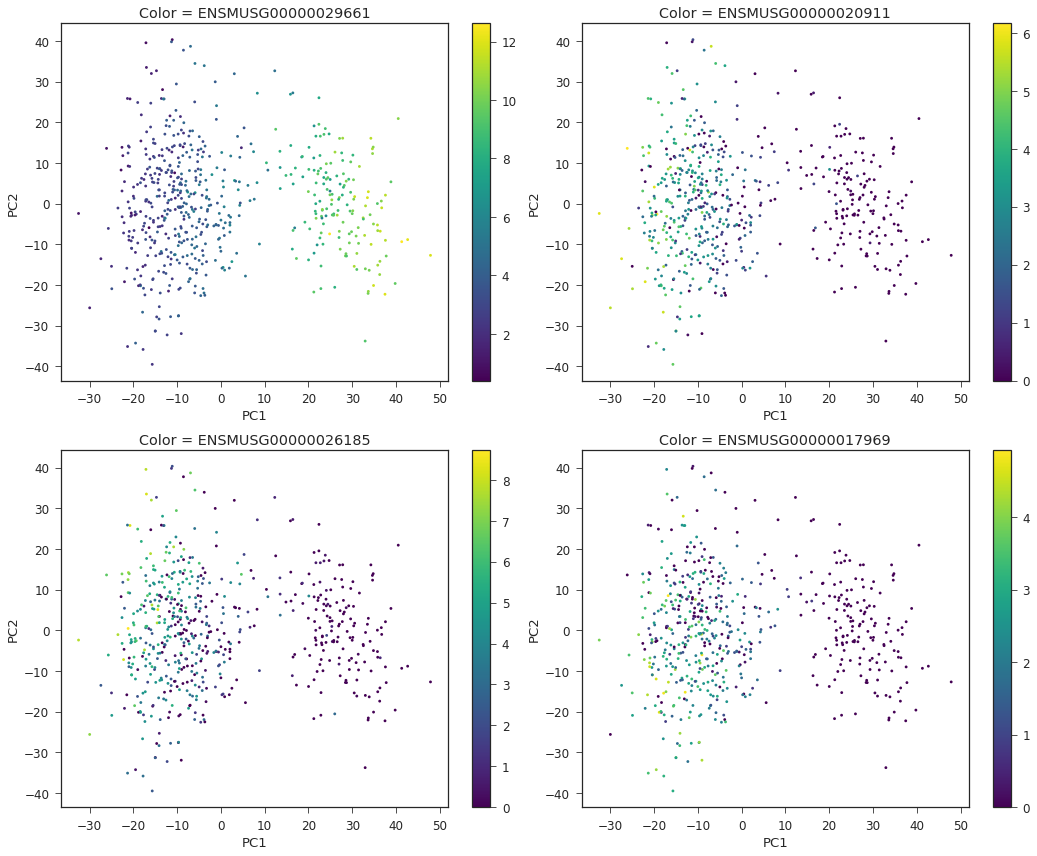

In [20]:
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=[15, 12])
genes = ['ENSMUSG00000029661', 'ENSMUSG00000020911', 'ENSMUSG00000026185', 'ENSMUSG00000017969']
for i in range(len(genes)):
    ax = fig.add_subplot(gs[i//2, i%2])
    scdata.scatter_gene_expression(genes=['PC1', 'PC2'], color=genes[i], fig=fig, ax=ax)

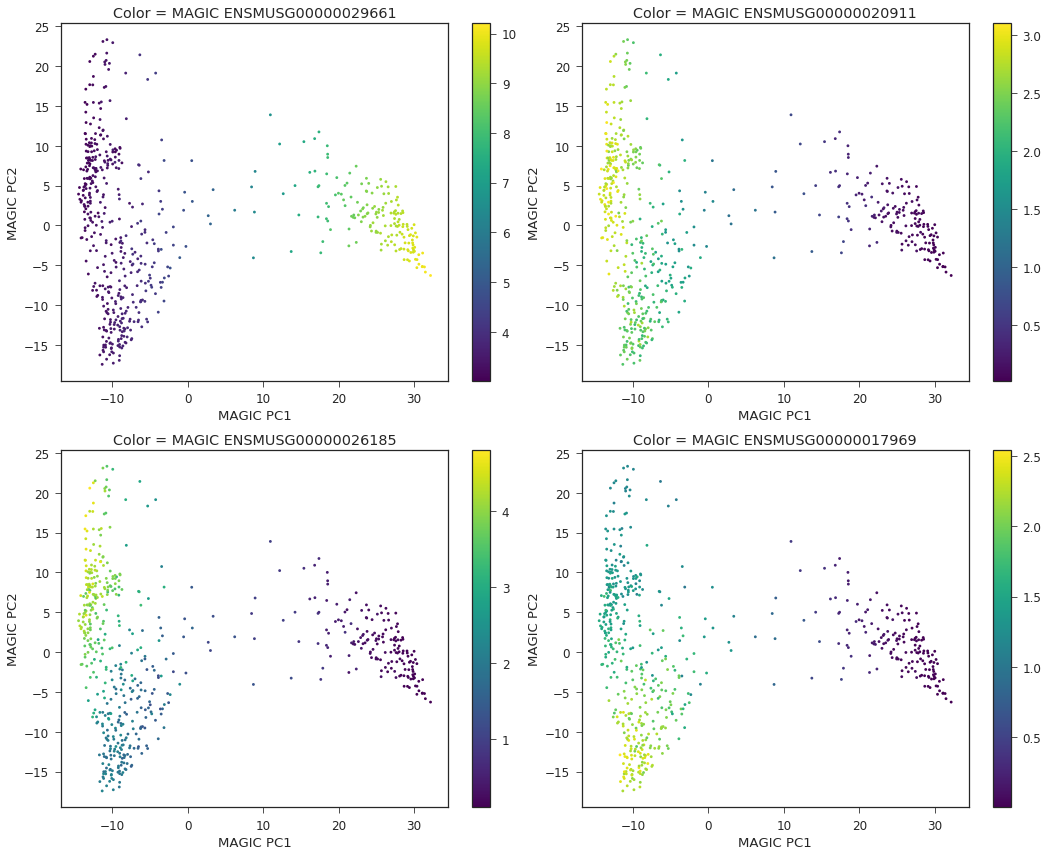

In [39]:
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=[15, 12])
genes = ['MAGIC ENSMUSG00000029661', 'MAGIC ENSMUSG00000020911', 'MAGIC ENSMUSG00000026185', 'MAGIC ENSMUSG00000017969']
for i in range(len(genes)):
    ax = fig.add_subplot(gs[i//2, i%2])
    scdata.magic.scatter_gene_expression(genes=['MAGIC PC1', 'MAGIC PC2'], color=genes[i], fig=fig, ax=ax)

In [35]:
mat = scdata.magic.data
mat.to_csv(path_or_buf="../output/exprs.norm.after.imputation.csv")